In [1]:
import glob, os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocessing 

### Image Loading

In [2]:
########## TensorFlow Preprocessing ########
def load_and_preprocess_image_tensor(path, target_shape):
    """
    Loads and image from PATH and returns a EagerTensor 
    shape: (H, W, C)
    dtype: float32
    """
    image = tf.io.read_file(path)
    return preprocess_image_tensor(image, target_shape)

def preprocess_image_tensor(image, target_shape):
    """Resizes given image"""
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
    image -= 0.5
    image *= 2
    image = tf.image.resize(image, 
                           target_shape
                          )
    return image


########## Non-TensorFlow Preprocessing ########
############# NOT USING THEM NOW ###############
def load_and_preprocess_image(path):
    image = plt.imread(path) / 255.
    return preprocess_image(image)

def preprocess_image(image):
    image = image - 0.5
    image = image * 2
    return image

def _floats_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value.reshape(-1)))

def wrap_bytes(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def featurize_img(img):
    r_channel = _floats_feature(img[0])
    g_channel = _floats_feature(img[1])
    b_channel = _floats_feature(img[2])
    height = tf.train.Feature(int64_list=tf.train.Int64List(value=[img.shape[0]]))
    width = tf.train.Feature(int64_list=tf.train.Int64List(value=[img.shape[1]]))
    return r_channel, g_channel, b_channel, height, width
###########################################

### Get Dataset Paths

In [3]:
def get_data_paths(data_dir):
    path_lst = []
    
    #assert dataset_type == 'train' or dataset_type == 'val', "Please specify either train or validation"
    for file in os.listdir(data_dir):
        if file.endswith(".jpg"):
            path_lst.append(os.path.join(data_dir, file))
    return path_lst

### Get TensorFlow Dataloader

In [4]:
def get_dataloader(path_lst, batch_size, target_size=(400, 400)):
    """Returns a batch dataset of size BATCH_SIZE"""
    process_fn = lambda path: load_and_preprocess_image_tensor(path, target_size)
    
    
    train_data = tf.data.Dataset.from_tensor_slices(
                 (tf.constant(path_lst)))

    return train_data.map(process_fn) \
             .shuffle(buffer_size=10000) \
             .batch(batch_size)

## Load Images from path and reshape

In [7]:
path_lst = get_data_paths('../../182-data/182-train/style')

In [19]:
batch_size = 10
dat = get_dataloader(path_lst, batch_size, target_size=(400, 400))

In [20]:
dat_iter = iter(dat)

In [21]:
next_im = next(dat_iter)
next_im = next(dat_iter)
next_im = next(dat_iter)

W0502 05:42:14.663286 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


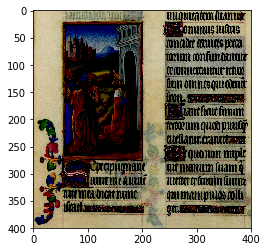

W0502 05:42:14.871950 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


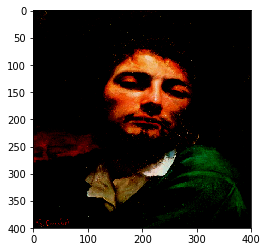

W0502 05:42:15.053272 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


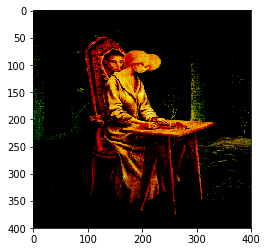

W0502 05:42:15.241100 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


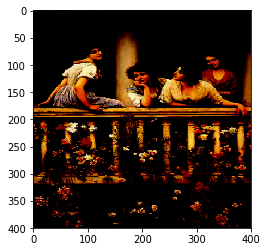

W0502 05:42:15.432771 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


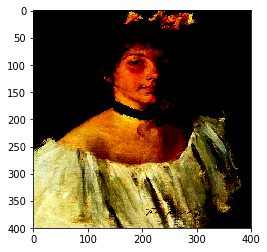

W0502 05:42:15.622578 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


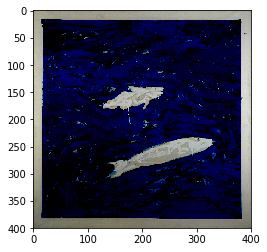

W0502 05:42:15.845229 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


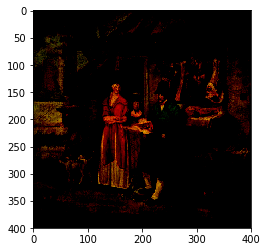

W0502 05:42:16.028902 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


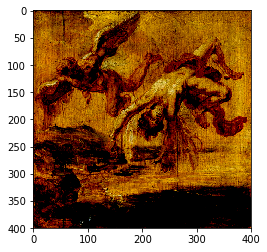

W0502 05:42:16.257333 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


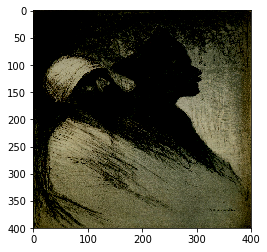

W0502 05:42:16.453898 140264393688896 image.py:663] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


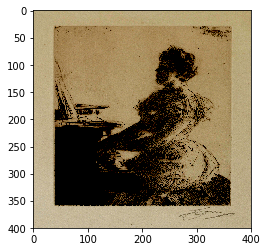

In [23]:
for img in next_im:
    plt.imshow(img)
    plt.show()